In [1]:
from pathlib import Path
import pandas as pd
from src.data_processing.preprocessing.pandas_preprocessors import *
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
data_path = Path(
    '/Users/mds8301/iterm_data_storage/raw_data_raw_data.parquet.gzip')
data = pd.read_parquet(data_path).drop(columns=["sex","latency", "learning_phase"])
        # .assign(event = lambda df_: df_.event.replace({'escape':'cross', 'avoid':'cross'}))
data.drop(columns = [])

,mouse_id,day,event,sensor,time,trial,signal,action,trial_count
0,12,5,cue,D2,-25.000000,0,-0.155359,escape,115
1,12,5,cue,D2,-24.901531,0,-0.420553,escape,115
2,12,5,cue,D2,-24.803064,0,-1.592294,escape,115
3,12,5,cue,D2,-24.704596,0,-1.268734,escape,115
4,12,5,cue,D2,-24.606127,0,-0.210176,escape,115
...,...,...,...,...,...,...,...,...,...
5860105,1,4,escape,D1,19.606127,1,0.299603,avoid,87
5860106,1,4,escape,D1,19.704596,1,-0.249408,avoid,87
5860107,1,4,escape,D1,19.803064,1,-0.486369,avoid,87
5860108,1,4,escape,D1,19.901531,1,-0.146374,avoid,87


In [19]:
normalize_by_baseline(data)


,mouse_id,day,event,sensor,time,signal,trial_count,trial,action
7620,12,5,cue,D2,0.010941,2.274165,115,0,escape
7621,12,5,cue,D2,0.010941,1.457484,115,0,escape
7622,12,5,cue,D2,0.010941,0.860711,115,0,escape
7623,12,5,cue,D2,0.010941,1.063052,115,0,escape
7624,12,5,cue,D2,0.010941,1.859095,115,0,escape
...,...,...,...,...,...,...,...,...,...
175786953,1,4,escape,D1,9.956236,-0.400093,87,1,avoid
175786954,1,4,escape,D1,9.956236,-0.518004,87,1,avoid
175786955,1,4,escape,D1,9.956236,0.093148,87,1,avoid
175786956,1,4,escape,D1,9.956236,0.333659,87,1,avoid


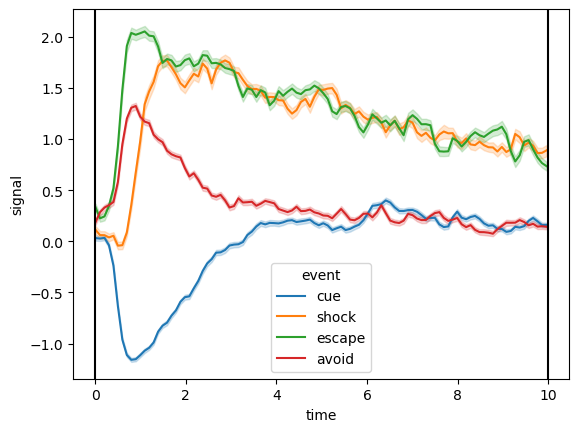

In [39]:
import seaborn as sns
to_plot = all_data.query("day==7 & sensor=='DA'")
sns.lineplot(x='time', y='signal', hue='event', data=to_plot)
plt.axvline(0, color='black')
plt.axvline(10, color='black')

In [25]:
final_experiment_preprocessor(data, baseline_normalizer=normalize_by_baseline, query = "sensor=='DA'")

,event,sensor,day,signal_max,signal_min,signal_trapz,pos_signal_trapz,neg_signal_trapz,ratio_avoid
0,cross,DA,1,5.577527,-3.148350,2056.700195,2921.468506,-864.768433,0.125000
1,cross,DA,3,3.829868,-5.435534,-1138.566650,1256.160889,-2394.727783,0.400000
2,cross,DA,3,4.454270,-3.519711,1044.149048,2175.139404,-1130.990356,0.400000
3,cross,DA,3,5.186427,-4.166742,1583.947021,2717.699463,-1133.752441,0.400000
4,cross,DA,3,5.106784,-4.187396,864.508057,2157.592285,-1293.084351,0.400000
...,...,...,...,...,...,...,...,...,...
6406,shock,DA,3,4.779027,-2.055609,2358.006348,2912.417725,-554.411499,0.235294
6407,shock,DA,4,3.616036,-2.055399,2493.895508,2869.091553,-375.196228,0.500000
6408,shock,DA,5,5.598697,-4.375846,3677.074219,4672.891113,-995.816772,0.666667
6409,shock,DA,6,6.761018,-2.924941,5091.970703,5489.692871,-397.722107,0.500000
